In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

pd.set_option("display.max_columns", None)

%matplotlib inline

sns.set_palette(palette='cool')
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')


# feature preprocessing and engineering.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import classification_report, accuracy_score

#machine learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [2]:
# Importing the data
df = pd.read_csv('/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv')
df.head() # print the first five rows present in the dataset.

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.shape

(383, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

Apart from the Age column, all the other columns are categorical.

In [5]:
df.describe().T

# Age ranges from 15 to  82 years. Tha makes sense.

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


In [6]:
# Check for null values

df.isnull().sum()  # The data has no missing values. Perfect!!

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

19

In [8]:
# The data has 19 duplicates.
#Dropping the duplicates
df.drop_duplicates(inplace=True)

# df.duplicated().sum()

In [9]:
# Cheching the number of unique values per column.

df.nunique()

# This number will come in handy when I want to encide the data for the purpose of machine learning.

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [10]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [11]:
# Ensure Consistency in the naming of the columns for easier remembrance when refering to them.

df.rename(columns={
    "Age": "age",
    "Gender": "gender",
    "Smoking": "smoking",
    "Hx Smoking": "smoking_history",
    "Hx Radiothreapy": "radiotherapy_history",
    "Thyroid Function": "thyroid_function",
    "Physical Examination": "physical_examination",
    "Adenopathy": "adenopathy",
    "Pathology": "pathology",
    "Focality": "focality",
    "Risk": "risk",
    "T": "tumor_classification",
    "N": "nodal_classification",
    "M": "metastatis",
    "Stage": "stage",
    "Response": "response",
    "Recurred": "recurred"
}, inplace=True)

df.head() # It looks better and more informative than before.

,age,gender,smoking,smoking_history,radiotherapy_history,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,tumor_classification,nodal_classification,metastatis,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [12]:
for column in df.columns:
    # Exclude Age
    if column != "age":
        print(f"{column} \n {df[column].unique()}")
        print()

gender 
 ['F' 'M']

smoking 
 ['No' 'Yes']

smoking_history 
 ['No' 'Yes']

radiotherapy_history 
 ['No' 'Yes']

thyroid_function 
 ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

physical_examination 
 ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

adenopathy 
 ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

pathology 
 ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

focality 
 ['Uni-Focal' 'Multi-Focal']

risk 
 ['Low' 'Intermediate' 'High']

tumor_classification 
 ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']

nodal_classification 
 ['N0' 'N1b' 'N1a']

metastatis 
 ['M0' 'M1']

stage 
 ['I' 'II' 'IVB' 'III' 'IVA']

response 
 ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']

recurred 
 ['No' 'Yes']



In [13]:

# Correcting values in 'physical_examination' column
df['physical_examination'].replace({
    "Single nodular goiter-left": "left",
    "Single nodular goiter-right": "right",
    "Multinodular goiter": "multinodular",
    "Diffuse goiter": "diffuse"
}, inplace=True)

# Correcting values in 'stage' column
df['stage'].replace({
    "I": 1,
    "II": 2,
    "III": 3,
    "IVA": 4,
    "IVB": 5
}, inplace=True)

# Correcting values in 'response' column
df['response'].replace({
    "Structural Incomplete": "incomplete",
    "Biochemical Incomplete": "incomplete"
}, inplace=True)

# Correcting values in 'nodal_classification' column
df['nodal_classification'].replace({
    "N0": "contained",
    "N1a": "spread",
    "N1b": "spread"
}, inplace=True)

# Correcting values in 'metastatis' column
df['metastatis'].replace({
    "M0": "absent",
    "M1": "present"
}, inplace=True)

# Correcting values in 'tumor_classification' column
df['tumor_classification'].replace({
    "T1a": "microscopic",
    "T1b": "small",
    "T2": "intermediate",
    "T3a": "local",
    "T3b": "invasive",
    "T4a": "extended",
    "T4b": "advanced"
}, inplace=True)

# Verify the changes
# df.head()


With the above changes already made, I am quite comfortable to proceed to the EDA.

## EDA

<Axes: xlabel='age', ylabel='Count'>

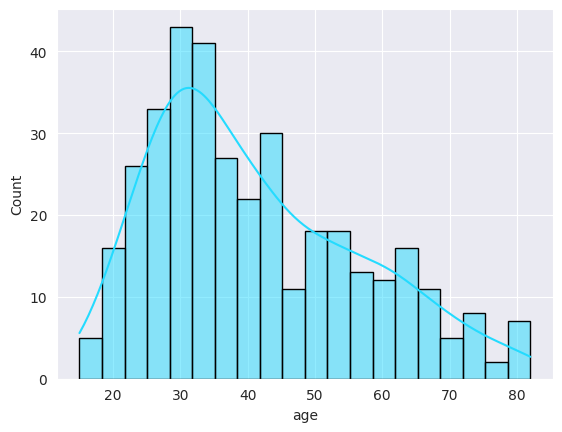

In [14]:
# starting with the age column.

sns.histplot(df['age'], kde= True, bins = 20, edgecolor = 'black')

Most of the individuals are aged between 20 - 50 years.

In [15]:
#  plotting the count plots for the different categorical features in the dataset

df_cat = df.drop(['age'], axis = 1)

df_cat.head()
print(df.shape)

(364, 17)


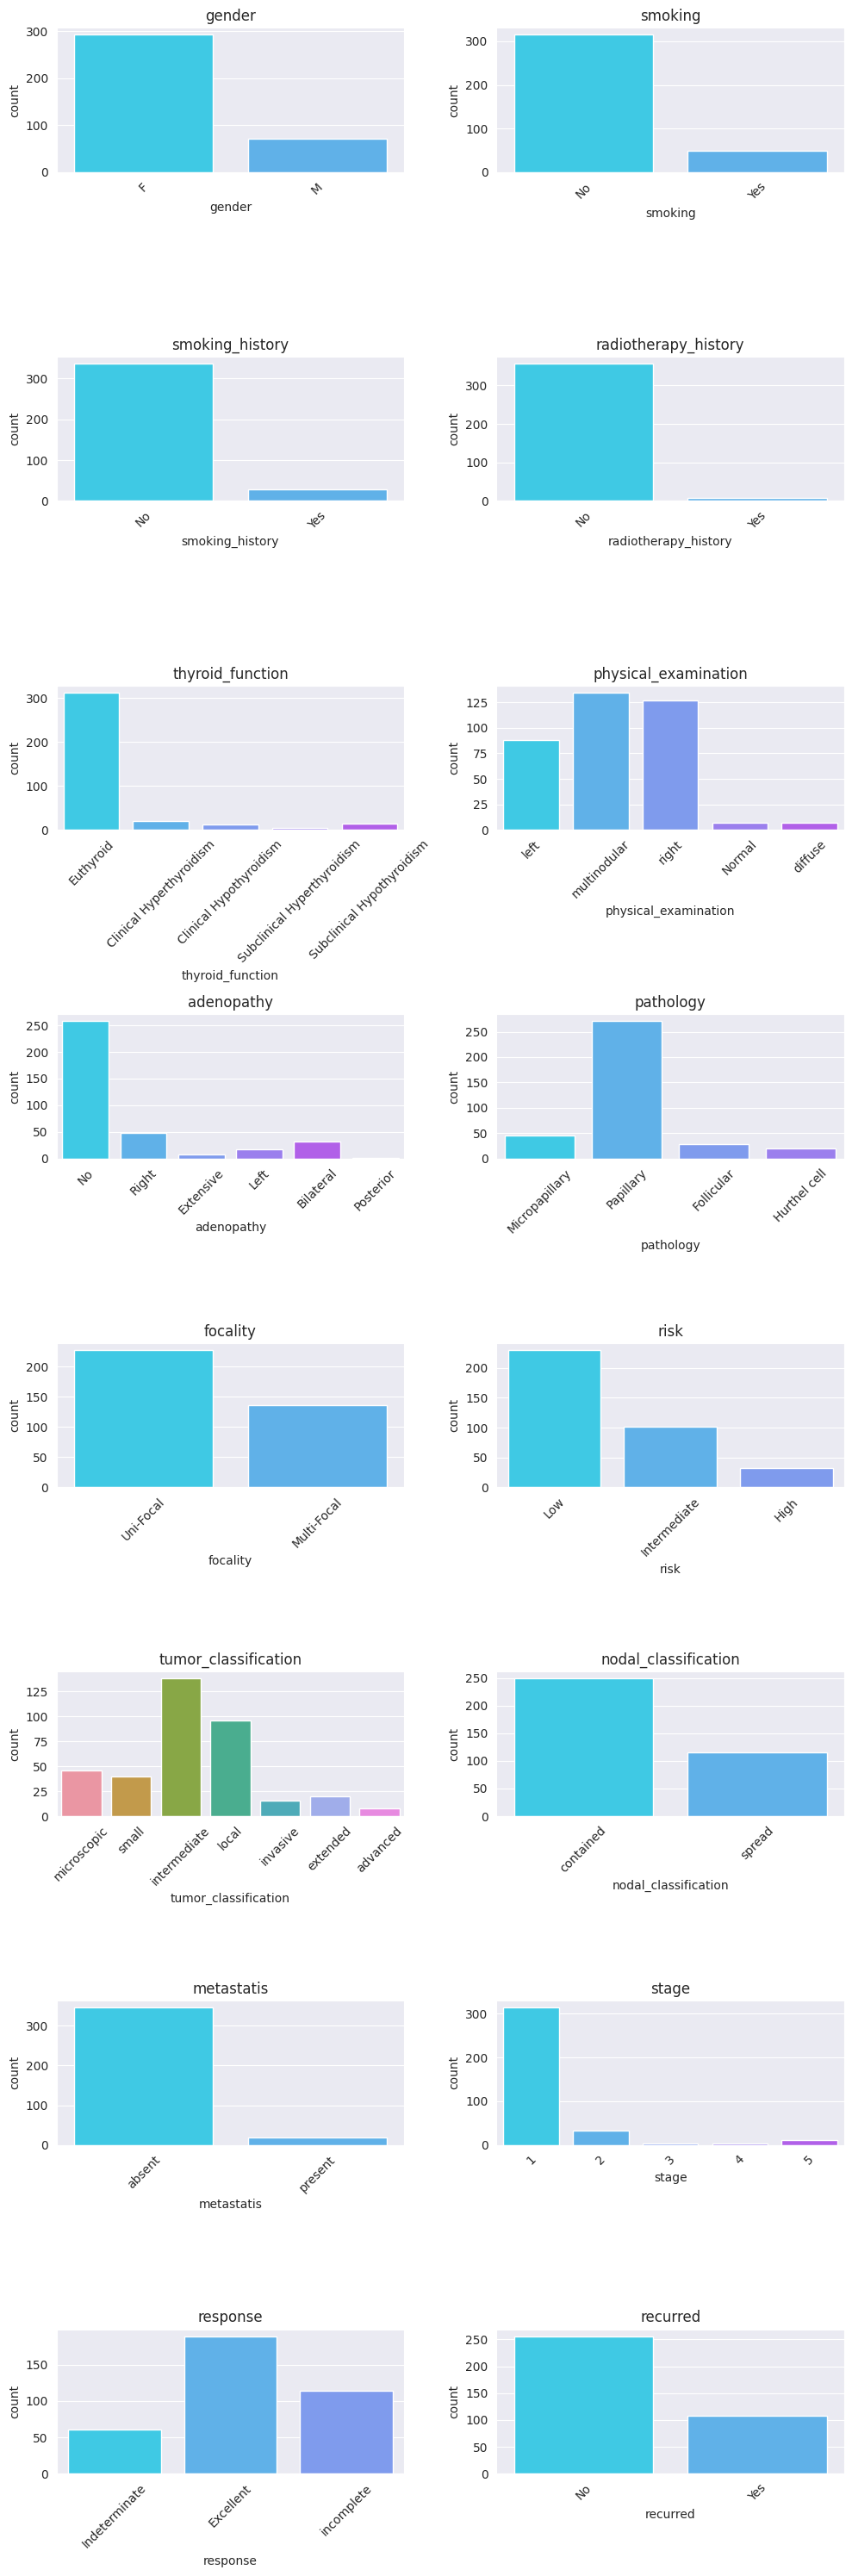

In [16]:
# plotting the countplots in a single figure.

nrows, ncols = 8, 2
fig, axes = plt.subplots(nrows, ncols, figsize = (10,30))

axes = axes.flatten()

# plotting the count plot for each column.
for i, column in enumerate(df_cat.columns):
    sns.countplot(x=df_cat[column], ax = axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


Some of the insights I have gathered from the above visualization are as follows:
1. There are higher recorvery rates
2. There are more females than males in the dataset.
3. Most patients did no suffer from adenopathy (Enlarged lymph nodes.)
4. The response for most of the patients was excellent.

Check the below visualizations for further analysis.

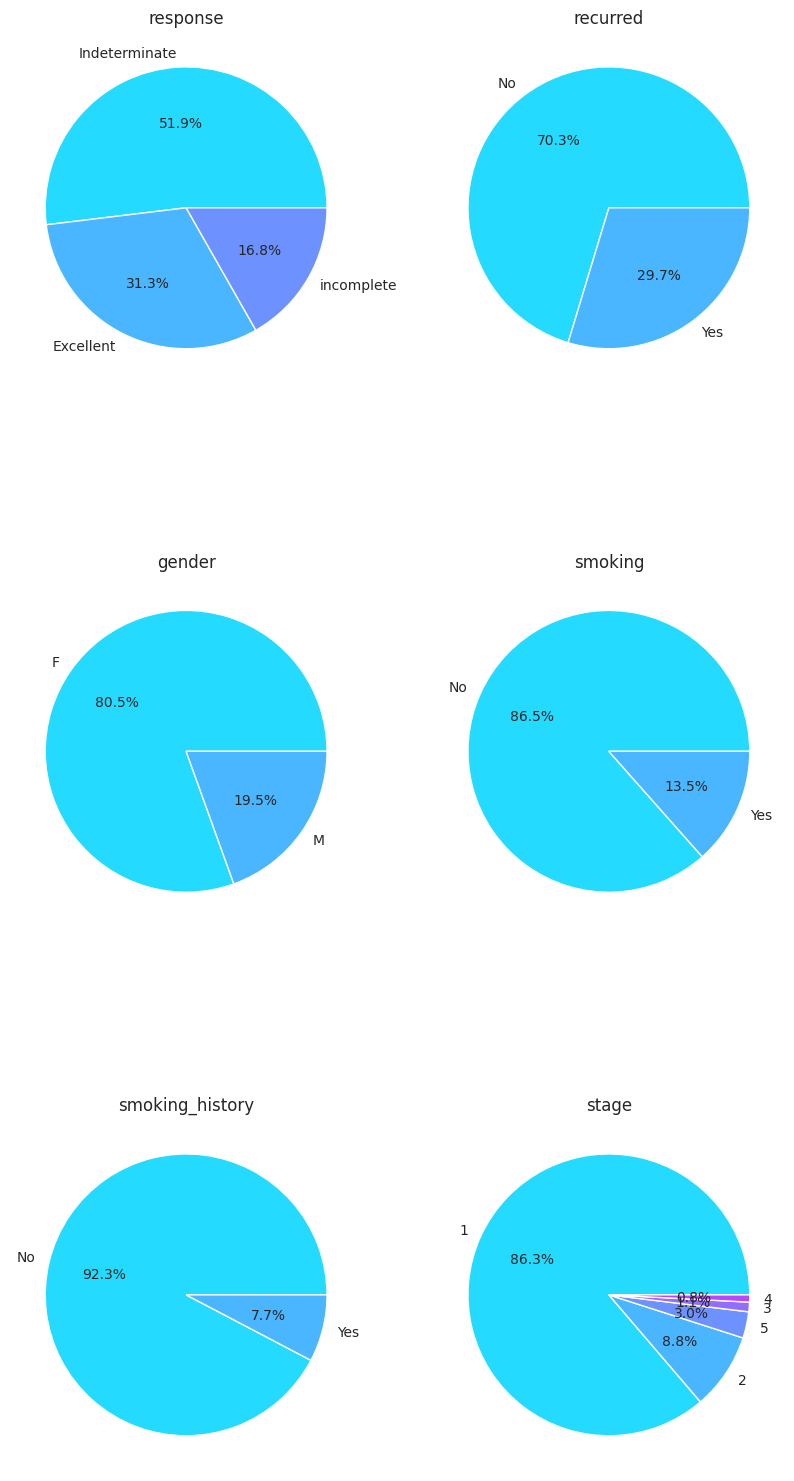

In [17]:
# plotting pie plots for the above insights (excluding the adenothapy state)
cols = ['response', 'recurred', 'gender', 'smoking', 'smoking_history', 'stage']

ncols, nrows = 2, 3

fig, axes = plt.subplots(nrows, ncols, figsize = (10,20))
axes = axes.flatten()

# Plotting pie plots for the features.
for i, column  in enumerate(cols):
    counts = df_cat[column].value_counts()
    labels = df_cat[column].unique() # Convert the unique categories to a list


    axes[i].pie(counts, labels = labels,  autopct = "%1.1f%%")
    axes[i].set_title(column)

### Bivariate EDA.

<Axes: xlabel='recurred', ylabel='age'>

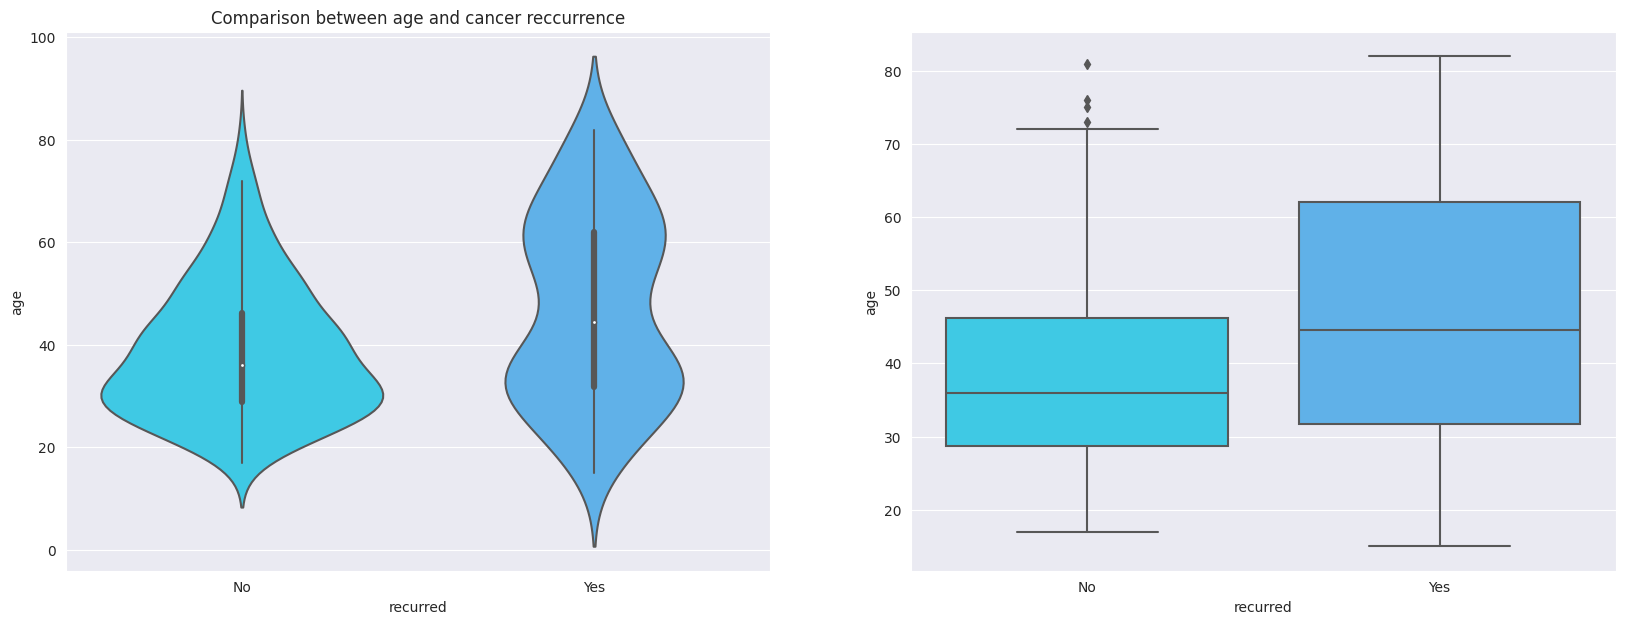

In [18]:
# Comparing the recorvery rate based on the age.
plt.figure(figsize = (20,7))

plt.subplot(121)
sns.violinplot(x = 'recurred', y = 'age', data = df)
plt.title("Comparison between age and cancer reccurrence")
plt.subplot(122)
sns.boxplot(data = df, x = 'recurred', y = 'age')

Older people have a higher chance of having a recuurence of Thyroid Cancer, compared to the younger people.

Text(0.5, 1.0, 'Comparison of recurrence and stages')

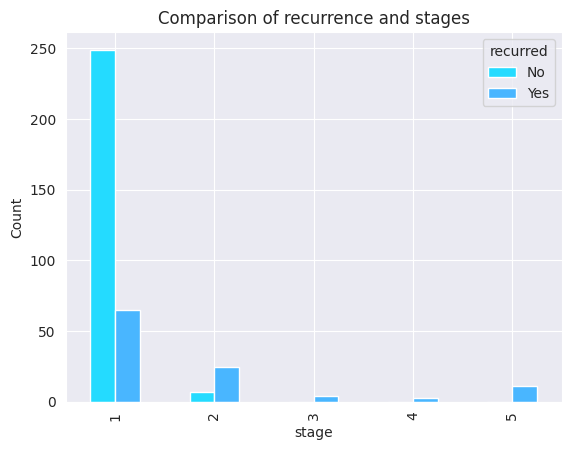

In [19]:
pd.crosstab(df['stage'], df['recurred']).plot(kind='bar', ax=plt.gca())
plt.ylabel("Count")
plt.title("Comparison of recurrence and stages")

From the data, the individual with stage > II were at a higher risk of the cancer recurring. (This might not be accurate since there is little data for individuals with stages > 2.)

Text(0, 0.5, 'Count')

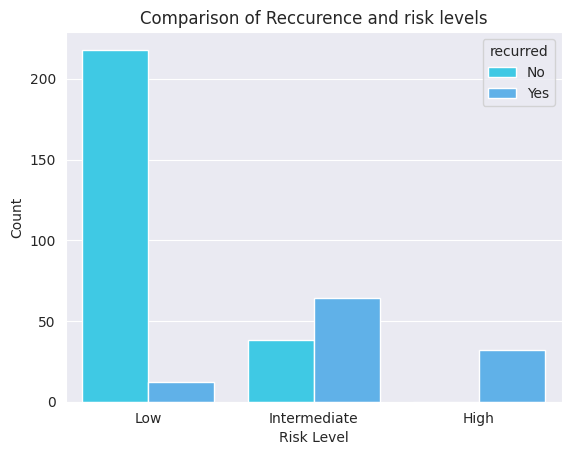

In [20]:
# Comparing the risk level and recurrence.

sns.countplot(data = df, x = 'risk', hue = 'recurred')
plt.title("Comparison of Reccurence and risk levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")

Patients at high and intermediate risk levels are ata a higher probability of having a recurrence of the cancer.

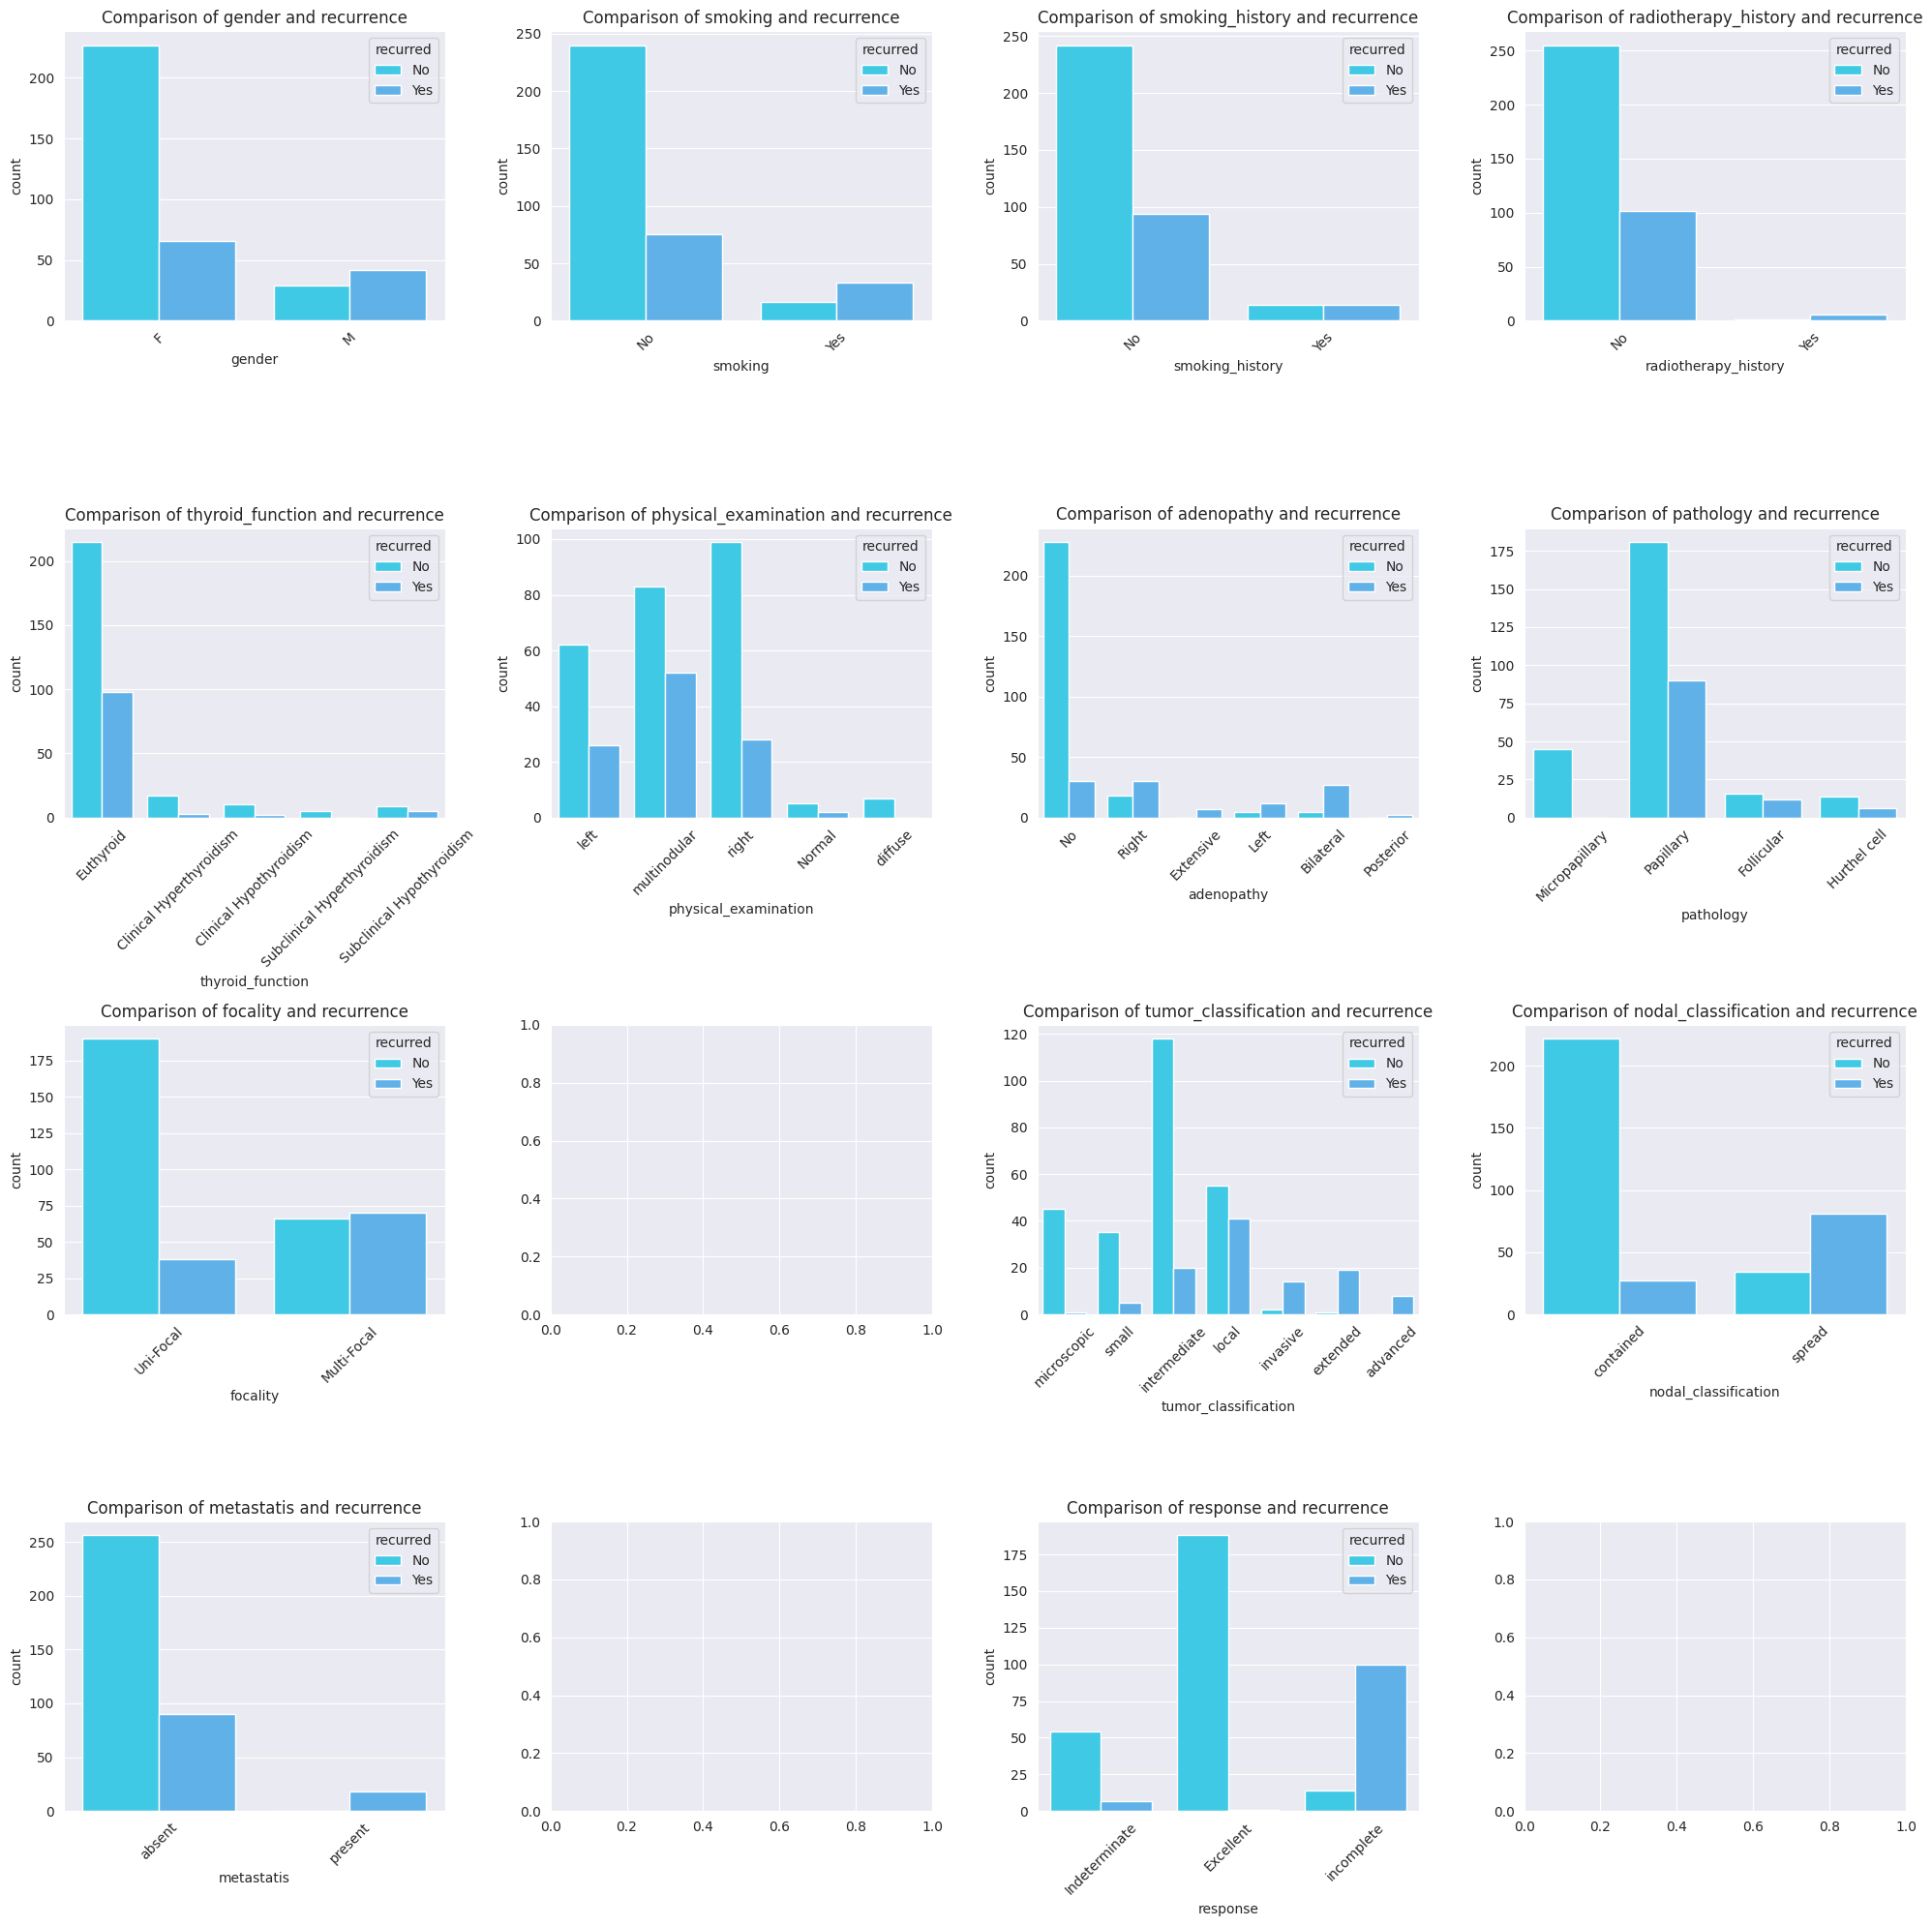

In [21]:
# plotting hue plots for the remaining columns.

fig, axes = plt.subplots(4, 4, figsize = (20, 20))
axes = axes.flatten()

# list of already plotted columns (including the recurred column since I wont need it now)
plotted = ['age', 'stage', 'recurred', 'risk']

# plot the figures for the columns.
for i, col in enumerate(df_cat.columns):
    if col not in plotted:
        sns.countplot(data = df, x = col, hue='recurred', ax = axes[i])
        axes[i].set_title("Comparison of {} and recurrence".format(col))
        axes[i].tick_params(axis = 'x', rotation = 45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

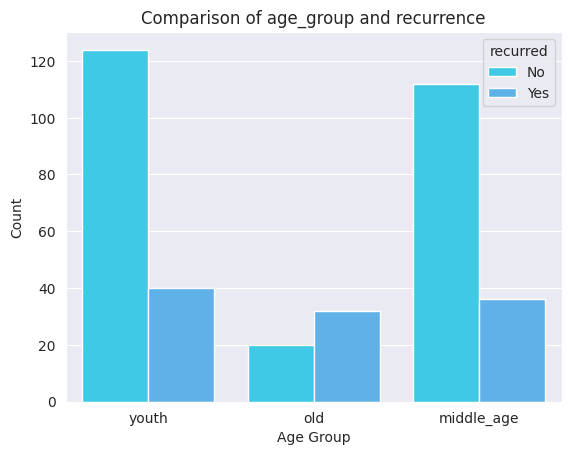

In [22]:
# creating a new column with categorical age groups

df['age_group'] = np.where(df['age'] <= 35, "youth", np.where(df['age'] <= 60, "middle_age", "old"))

# compare the age groups with the recurrence column

sns.countplot(data=df, x='age_group', hue='recurred')
plt.title("Comparison of age_group and recurrence")
plt.xlabel("Age Group")
plt.ylabel("Count")

In [23]:
# percentage of recorvery based on the age groups.

df_young = df[df['age_group'] == "youth"]
df_middle = df[df['age_group'] == "middle_age"]
df_old = df[df['age_group'] == "old"]

recurred_young = (len(df_young[df_young['recurred'] == "Yes"])/ len(df_young)) * 100
recurred_middle = (len(df_middle[df_middle['recurred'] == "Yes"])/ len(df_middle)) * 100
recurred_old = (len(df_old[df_old['recurred'] == "Yes"])/ len(df_old)) * 100

percentage_recurrence = pd.DataFrame({"AGE GROUP": ["YOUNG", "MIDLE AGED", "OLD"], "RECURRENCE PERCENTAGE": [recurred_young, recurred_middle, recurred_old]})

percentage_recurrence

,AGE GROUP,RECURRENCE PERCENTAGE
0,YOUNG,24.390244
1,MIDLE AGED,24.324324
2,OLD,61.538462


WOW!!!!

There seems to be some factors that directly contribute to the recurrence of Cancer. Patients with the following conditions are at a higher risk:
1. People who smoke
2. Patients with a radiotherapy history
3. Males (😒😒😒)  There might be another factor contributing to this, but I won't get deeper into this at the moment.
4. Focality (MultiFocal ( Cancer is present in multiple locations.))
5. Tummor classification based on size and extent of invasion (T3b(invasive), T4a(extended), T4b(advanced))
6. Involvment of Lymph node (spread to other lymph node(N1a, n1b)) - column renamed to nodal classification
7. If the cancer had metasized (cancer had spread to other parts of the body) 
8. Those to whom the treatment responded negatively to them (response = "Biochemical Incomplete" or response = "Structural Incomplete")
9. As asserted earlier, older people are at a higher risk of the cancer recurring.

## Data Preparation

#### 1. Encoding the data.


In [24]:

df.drop(['age_group'], axis=1, inplace=True)

# converting the stage column to int.
df['stage'] = pd.to_numeric(df['stage'])

# df.info()


In [25]:
# label encoder 
le = ['gender', 'smoking', 'smoking_history', 'radiotherapy_history', 'metastatis', 'recurred', 'nodal_classification', 'focality']
# one hot encoder
ohe = ['adenopathy', 'thyroid_function', 'physical_examination', 'pathology']

# ordinal encoding
ore = ['tumor_classification', 'response', 'nodal_classification', 'risk']


In [26]:
# label encoding 
lbe = LabelEncoder()

for column in le:
    df[column] = lbe.fit_transform(df[column])


# using one hot encoder.
df = pd.get_dummies(df, columns=ohe, drop_first=True)
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)



In [27]:
df.head()

,age,gender,smoking,smoking_history,radiotherapy_history,focality,risk,tumor_classification,nodal_classification,metastatis,stage,response,recurred,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,thyroid_function_Clinical Hypothyroidism,thyroid_function_Euthyroid,thyroid_function_Subclinical Hyperthyroidism,thyroid_function_Subclinical Hypothyroidism,physical_examination_diffuse,physical_examination_left,physical_examination_multinodular,physical_examination_right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary
0,27,0,0,0,0,1,Low,microscopic,0,0,1,Indeterminate,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,34,0,0,1,0,1,Low,microscopic,0,0,1,Excellent,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,30,0,0,0,0,1,Low,microscopic,0,0,1,Excellent,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,62,0,0,0,0,1,Low,microscopic,0,0,1,Excellent,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
4,62,0,0,0,0,0,Low,microscopic,0,0,1,Excellent,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [28]:
# The values below I've replaced them manually since they are ordinal in nature.
df['tumor_classification'].replace({"microscopic": 0, "small":1, "intermediate": 2, "local": 3, "invasive":4, "extended": 5, "advanced":6}, inplace=True)
df['tumor_classification'] = df['tumor_classification'].astype(int)

df['risk'].replace({"Low":0, "Intermediate": 1, "High": 2}, inplace=True)
df['risk'] = df['risk'].astype(int)

df['response'].replace({"incomplete": 0,  "Indeterminate": 1, "Excellent": 2}, inplace=True)
df['response'] = df['response'].astype(int)

df.head()

,age,gender,smoking,smoking_history,radiotherapy_history,focality,risk,tumor_classification,nodal_classification,metastatis,stage,response,recurred,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,thyroid_function_Clinical Hypothyroidism,thyroid_function_Euthyroid,thyroid_function_Subclinical Hyperthyroidism,thyroid_function_Subclinical Hypothyroidism,physical_examination_diffuse,physical_examination_left,physical_examination_multinodular,physical_examination_right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary
0,27,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,34,0,0,1,0,1,0,0,0,0,1,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,30,0,0,0,0,1,0,0,0,0,1,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,62,0,0,0,0,1,0,0,0,0,1,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
4,62,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


<Axes: >

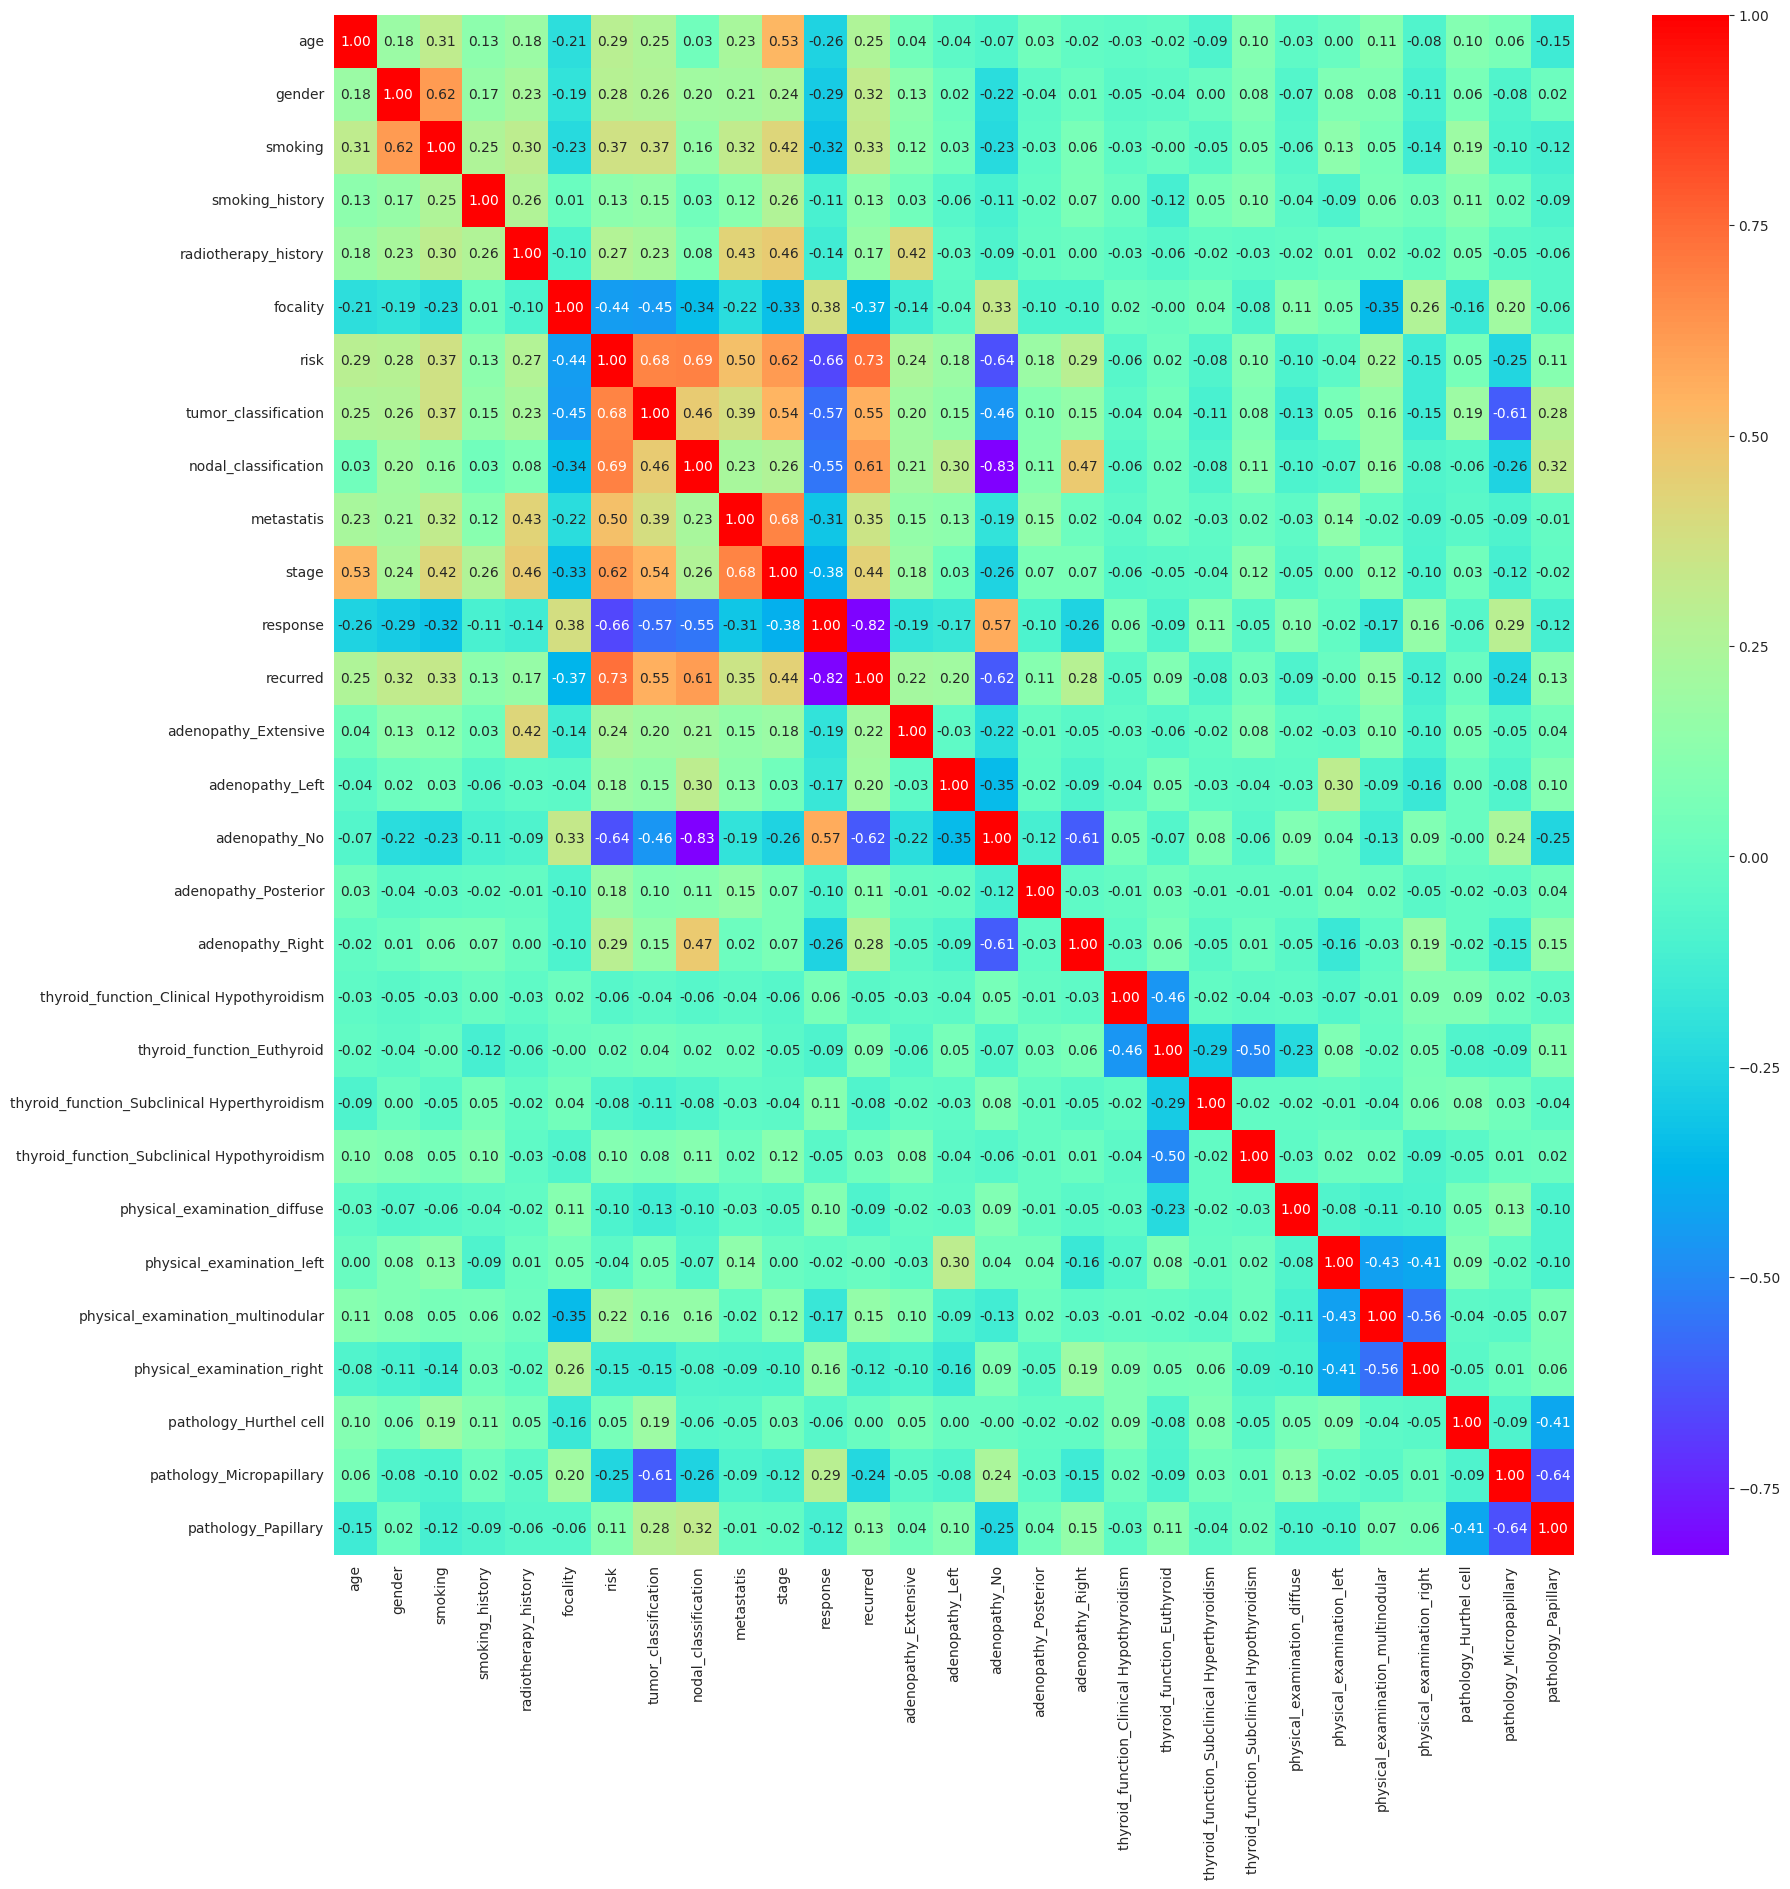

In [29]:
# plot a correlation matrix
fig, axes = plt.subplots(figsize = (20, 20))

matrix = df.corr().round(2)

sns.heatmap(matrix, annot=True, fmt=".2f", ax=axes ,cmap='rainbow')


### MODELLING 

In [30]:
# splitting the fetures from the label.
X = df.drop(['recurred'], axis=1)
y = df['recurred']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state = 42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()

}


n_classifiers = len(models)

for index, (name, classifier) in enumerate(models.items()):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)

    print("Accuracy (train) for %s: %0.1f%%" % (name, accuracy * 100))
    print(classification_report(y_test, y_pred))

Accuracy (train) for Decision Tree: 90.9%
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        72
           1       0.87      0.87      0.87        38

    accuracy                           0.91       110
   macro avg       0.90      0.90      0.90       110
weighted avg       0.91      0.91      0.91       110

Accuracy (train) for Random Forest: 95.5%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.89      0.93        38

    accuracy                           0.95       110
   macro avg       0.96      0.94      0.95       110
weighted avg       0.96      0.95      0.95       110

Accuracy (train) for K-Nearest Neighbors: 89.1%
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        72
           1       1.00      0.68      0.81        38

    accuracy                           0.89       

    The best classifier was XGBClassifier with an accuracy of 97.3%